In [1]:
### DRPreter Graph Embedding + PaDEL Descriptor + ResNet

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K

In [2]:
import pandas as pd
train_data = pd.read_csv('/data/yingfei/cancer_data/train_data.csv')
test_data = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [3]:
train_data = train_data.loc[train_data['auc'] >= 0]
train_data = train_data.reset_index(drop = True)
train_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000001,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.778432
1,ACH-000001,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.951321
2,ACH-000001,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.840287
3,ACH-000001,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936410
4,ACH-000001,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.891908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,ACH-001716,KIN001-236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.956865
203914,ACH-001716,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975168
203915,ACH-001716,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.871995
203916,ACH-001716,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975417


In [4]:
test_data = test_data.loc[test_data['auc'] >= 0]
test_data = test_data.reset_index(drop = True)
test_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000802,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.528562
1,ACH-000802,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.930958
2,ACH-000802,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.759249
3,ACH-000802,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936510
4,ACH-000802,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.823453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,ACH-000438,KIN001-266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975578
22874,ACH-000438,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.980529
22875,ACH-000438,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.960501
22876,ACH-000438,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.970524


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_padel_features = train_data[train_data.columns[-2326:-1]]
train_padel_features = scaler.fit_transform(train_padel_features)
train_padel_features = pd.DataFrame(train_padel_features)

In [6]:
test_padel_features = test_data[test_data.columns[-2326:-1]]
test_padel_features = scaler.transform(test_padel_features)
test_padel_features = pd.DataFrame(test_padel_features)

In [7]:
import io
import torch
import pickle

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

/home/yingfei/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
with open('cell_line_embedding_dict_seg_comb.pickle', 'rb') as file:
    cell_line_embedding_dict = CPU_Unpickler(file).load()

In [9]:
with open('drug_embedding_dict_seg_comb.pickle', 'rb') as file:
    drug_embedding_dict = CPU_Unpickler(file).load()

In [10]:
check = cell_line_embedding_dict['ACH-000001'][:, :-1, :].sum(dim=1)
check.sum(dim=0).reshape(1,35,256).shape

torch.Size([1, 35, 256])

In [11]:
cell_line_embedding_dict_new = {key:value.sum(dim=0).reshape(1,35,256)[:, :-1, :].sum(dim=1) 
                                for key,value in cell_line_embedding_dict.items()}

In [12]:
cell_line_embedding_dict_new['ACH-000001'].shape

torch.Size([1, 256])

In [13]:
train_padel_features.shape

(203918, 2325)

In [14]:
train_padel_features = train_padel_features.to_numpy().reshape(train_padel_features.shape[0], train_padel_features.shape[1], 1)
test_padel_features = test_padel_features.to_numpy().reshape(test_padel_features.shape[0], test_padel_features.shape[1], 1)

In [15]:
print(train_padel_features.shape, test_padel_features.shape)

(203918, 2325, 1) (22878, 2325, 1)


In [16]:
train_cell_emb = []
for i in range(len(train_data)):
    cell_line_id = train_data['ARXSPAN_ID'][i]
    train_cell_emb.append(cell_line_embedding_dict_new[cell_line_id].detach().numpy()[0])

In [17]:
train_cell_emb = np.array(train_cell_emb)

In [18]:
test_cell_emb = []
for i in range(len(test_data)):
    cell_line_id = test_data['ARXSPAN_ID'][i]
    test_cell_emb.append(cell_line_embedding_dict_new[cell_line_id].detach().numpy()[0])

In [19]:
train_cell_emb = np.array(train_cell_emb)
train_cell_emb = train_cell_emb.reshape(train_cell_emb.shape[0], train_cell_emb.shape[1], 1)
test_cell_emb = np.array(test_cell_emb)
test_cell_emb = test_cell_emb.reshape(test_cell_emb.shape[0], test_cell_emb.shape[1], 1)

In [20]:
print(train_cell_emb.shape, test_cell_emb.shape)

(203918, 256, 1) (22878, 256, 1)


In [21]:
train_label = train_data['auc']
print(f'Minimum train y value: {min(train_label)}, \
      Maximum train y value: {max(train_label)}')

test_label = test_data['auc']
print(f'Minimum test y value: {min(test_label)}, \
      Maximum test y value: {max(test_label)}')

Minimum train y value: 0.004496,       Maximum train y value: 0.999883
Minimum test y value: 0.013524,       Maximum test y value: 0.998284


In [22]:
### Train test split
from sklearn.model_selection import train_test_split
# train_padel_features
train_padel_features, val_padel_features, train_y, val_y = train_test_split(
    train_padel_features, train_label, random_state = 42)

In [23]:
train_cell_emb, val_cell_emb, train_y, val_y = train_test_split(
    train_cell_emb, train_label, random_state = 42)

In [24]:
train_padel_features = np.nan_to_num(train_padel_features)
train_cell_emb = np.nan_to_num(train_cell_emb)
train_y = np.nan_to_num(train_y)

In [25]:
val_padel_features = np.nan_to_num(val_padel_features)
val_cell_emb = np.nan_to_num(val_cell_emb)
val_y = np.nan_to_num(val_y)

In [26]:
test_padel_features = np.nan_to_num(test_padel_features)
test_cell_emb = np.nan_to_num(test_cell_emb)
test_y = np.nan_to_num(test_label)

In [27]:
### Hyperparameters set
params_lst = ["learning_rate", "batch_size", "optimizer"]
params_value_dict = {"learning_rate": [5e-5, 1e-4, 2e-4], 
                     "batch_size": [128, 256], 
                     "optimizer": ['sgd','adam']}
import itertools as it

allparams = params_value_dict
combinations = it.product(*(params_value_dict[param] for param in allparams))
combinations_lst = list(combinations)
print(len(combinations_lst))

hyper_param_dict = {}
for i in range(len(combinations_lst)):
    hyper_param_dict[i] = {}
    for j in range(len(params_lst)):
        hyper_param_dict[i][params_lst[j]] = combinations_lst[i][j]

12


In [ ]:
import json
from keras.models import model_from_json, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.layers import concatenate
workdir = "../resnet_ht_models/emb_model_graph_3"

model_eval_dict = {}
model_dict = {}
training_epochs = 20
model_ht_history = {}

for i in hyper_param_dict:
    params_dict = hyper_param_dict[i]
    learning_rate=params_dict["learning_rate"] 
    batch_size=params_dict["batch_size"] 
    opt_name=params_dict["optimizer"]
    
    # hyper parameters
    num_classes = 1
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    else: # sgd
        optimizer = keras.optimizers.SGD(learning_rate)
    
    with K.tf.device('/GPU:0'): # model compile
        # inputs = Input(shape=(train_X.shape[1],1),name='inputs')
        
        cell_input = Input(shape=(256,1),  name='cell_input') 
        drug_input = Input(shape=(2325,1), name='drug_input')
        inputs = concatenate([cell_input, drug_input],axis=1) 

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

        # model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN')
        model = Model(inputs=[cell_input , drug_input], outputs=[predictions])
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=optimizer,
                      metrics=['mse','mae'])
        
        # model training
        StartTime8 = datetime.now()
        print("StartTime :", StartTime8)
        with K.tf.device('/GPU:0'):
            # model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
            #                     validation_data=(val_X, val_y))
            model_train = model.fit({'cell_input': train_cell_emb, 'drug_input': train_padel_features}, train_y, 
                                    batch_size=batch_size,epochs=training_epochs,verbose=1,
                                    validation_data=({'cell_input': val_cell_emb, 
                                                      'drug_input': val_padel_features}
                                                     , val_y))

        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    model.save_weights(workdir+ f'/model_{i}_new.h5')
    with open(workdir + f'/model_architecture_{i}_new.json', 'w') as f:
        f.write(model.to_json())
        
    # evaluation
    print(f"Evaluating model {i}...")
    test_score = model.evaluate({'cell_input': test_cell_emb, 'drug_input': test_padel_features}, test_y, verbose=1)
    model_ht_history[(learning_rate, batch_size)] = model
    loss, mse, mae = test_score
    print("loss=%.6f, mse=%.6f, mae=%.6f"%(loss, mse, mae))
    
    model_dict[i] = model
    model_eval_dict[i] = {"loss":loss, "mse":mse, "mae":mae}

StartTime : 2023-03-26 13:43:24.243663
Epoch 1/20
1195/1195 [==============================] - 264s 211ms/step - loss: 0.7881 - mse: 0.7881 - mae: 0.7043 - val_loss: 0.3788 - val_mse: 0.3788 - val_mae: 0.4976
Epoch 2/20
1195/1195 [==============================] - 244s 204ms/step - loss: 0.5736 - mse: 0.5736 - mae: 0.5984 - val_loss: 0.3266 - val_mse: 0.3266 - val_mae: 0.4604
Epoch 3/20
1195/1195 [==============================] - 244s 204ms/step - loss: 0.4867 - mse: 0.4867 - mae: 0.5511 - val_loss: 0.2378 - val_mse: 0.2378 - val_mae: 0.3907
Epoch 4/20
1195/1195 [==============================] - 245s 205ms/step - loss: 0.4187 - mse: 0.4187 - mae: 0.5106 - val_loss: 0.1972 - val_mse: 0.1972 - val_mae: 0.3561
Epoch 5/20
1195/1195 [==============================] - 247s 206ms/step - loss: 0.3748 - mse: 0.3748 - mae: 0.4810 - val_loss: 0.1691 - val_mse: 0.1691 - val_mae: 0.3305
Epoch 6/20
1195/1195 [==============================] - 244s 204ms/step - loss: 0.3339 - mse: 0.3339 - mae: 0.4

In [34]:
min_mse = 10
bst_model_id_lst = []
for i in model_eval_dict:
    if model_eval_dict[i]['mse'] < min_mse:
        bst_model_id_lst = []
        bst_model_id_lst.append(i)
        min_mse = model_eval_dict[i]['mse']
    elif model_eval_dict[i]['mse'] == min_mse:
        bst_model_id_lst.append(i)

In [35]:
idx = bst_model_id_lst[0]
idx

9

In [36]:
model_eval_dict[idx]

{'loss': 0.015871359035372734,
 'mse': 0.015871359035372734,
 'mae': 0.07831920683383942}

In [37]:
best_model = model_dict[idx]

In [38]:
hyper_param_dict[idx]

{'learning_rate': 0.0002, 'batch_size': 128, 'optimizer': 'adam'}

In [39]:
test_eval = best_model.evaluate({'cell_input': test_cell_emb, 'drug_input': test_padel_features}, test_y, verbose=1)

715/715 [==============================] - 30s 42ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0783


In [40]:
import matplotlib
from matplotlib import pyplot as plt

715/715 [==============================] - 31s 41ms/step


Text(0, 0.5, 'predicted_AUC_value')

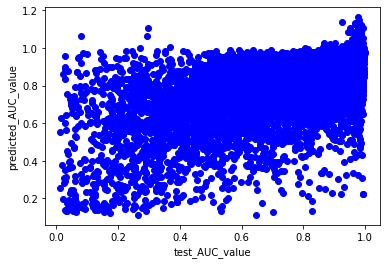

In [41]:
predicted_value = model.predict({'cell_input': test_cell_emb, 'drug_input': test_padel_features})
plt.scatter(test_y,predicted_value,c='blue')
plt.xlabel('test_AUC_value')
plt.ylabel('predicted_AUC_value')

In [42]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [43]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.12997123317565354


In [44]:
mae = (np.abs(b[0]-a[0])).sum()
mae / len(b)

0.07762004496620327

In [45]:
mse

0.016892521453200107

In [46]:
from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.4977204631411377


In [47]:
full_test = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

full_test = full_test[['ARXSPAN_ID', 'DRUG_NAME']]
eval_data = test_data[['ARXSPAN_ID', 'DRUG_NAME', 'auc']].copy()
eval_data['pred_auc'] = predicted_value
eval_data

,ARXSPAN_ID,DRUG_NAME,auc,pred_auc
0,ACH-000802,JW-7-24-1,0.528562,0.811086
1,ACH-000802,KIN001-260,0.930958,0.955779
2,ACH-000802,NSC-87877,0.759249,0.894800
3,ACH-000802,PLX-4720,0.936510,0.944667
4,ACH-000802,ERK5-IN-1,0.823453,0.882575
...,...,...,...,...
22873,ACH-000438,KIN001-266,0.975578,0.817040
22874,ACH-000438,LUMINESPIB,0.980529,0.983891
22875,ACH-000438,NUTLIN-3A,0.960501,0.942115
22876,ACH-000438,SGC0946,0.970524,0.980321


In [48]:
full_test['comb'] = full_test.ARXSPAN_ID + full_test.DRUG_NAME
eval_data['comb'] = eval_data.ARXSPAN_ID + eval_data.DRUG_NAME
eval_data = pd.merge(full_test, eval_data, on = ['ARXSPAN_ID', 'DRUG_NAME'], how = 'left')

In [49]:
eval_data_arr = pd.DataFrame(eval_data.ARXSPAN_ID.unique(), columns = ['ARXSPAN_ID'])
eval_data_arr['true_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr['pred_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,[],[]
1,ACH-001496,[],[]
2,ACH-000267,[],[]
3,ACH-000508,[],[]
4,ACH-001106,[],[]
...,...,...,...
64,ACH-000953,[],[]
65,ACH-000561,[],[]
66,ACH-000819,[],[]
67,ACH-000873,[],[]


In [50]:
for i in range(len(eval_data)):
    cl_id = eval_data.loc[i, 'ARXSPAN_ID']
    auc = eval_data.loc[i, 'auc']
    pred_auc =  eval_data.loc[i, 'pred_auc']
    if np.isnan(auc):
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(1)
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(1)
        continue
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(auc)
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(pred_auc)

In [51]:
pred_values = eval_data_arr.pred_auc_arr.apply(lambda x: np.array(x)).to_numpy()
true_values = eval_data_arr.true_auc_arr.apply(lambda x: np.array(x)).to_numpy()

In [52]:
### NDCG
from sklearn.metrics import ndcg_score
#ndcg_all = ndcg_score([p for p in pred_values],[t for t in true_values])
#ndcg_10 = ndcg_score([p for p in pred_values],[t for t in true_values], k = 10)
ndcg_all_values = []
ndcg_10_values = []
for i in range(len(pred_values)):
    pred_value = eval_data_arr['pred_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    true_value = eval_data_arr['true_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    ndcg_all_values.append(ndcg_score([pred_value],[true_value]))
    ndcg_10_values.append(ndcg_score([pred_value],[true_value], k = 10))
    
ndcg_all = np.mean(ndcg_all_values)
ndcg_10 = np.mean(ndcg_10_values)

print(ndcg_all)
print(ndcg_10)

0.9213663207091134
0.7401221179069518


In [53]:
### Recall
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_idx_perf = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k drugs's idx
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        # step 2
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        assert gt_aucs.shape == pred_scores.shape
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 3
        # recall@k
        cur_recall_at_k = len(
            set(topk_drug_idx_pred).intersection(set(topk_drug_idx_gt))
        ) / len(set(topk_drug_idx_gt))
        dict_test_cell_line_idx_perf[cur_cell_line_idx] = cur_recall_at_k

    avg_recall_at_k = np.mean(list(dict_test_cell_line_idx_perf.values()))
    results.append((f"Recall@{top_k}", round(avg_recall_at_k, 4)))
print(results)

[('Recall@1', 0.3768), ('Recall@2', 0.3986), ('Recall@5', 0.3971), ('Recall@10', 0.4304)]


In [54]:
### AUC
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_topk_auc_sum_gt = {}
    dict_test_cell_line_topk_auc_sum_pred = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 2
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k predicted drugs' (per ground truth) aucs
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        dict_test_cell_line_topk_auc_sum_gt[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_gt]
        )
        dict_test_cell_line_topk_auc_sum_pred[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_pred]
        )

    avg_auc_topk_gt = np.mean(
        list(dict_test_cell_line_topk_auc_sum_gt.values())
    )
    avg_auc_topk_pred = np.mean(
        list(dict_test_cell_line_topk_auc_sum_pred.values())
    )

    results.append(
        (
            f"Auc@{top_k}",
            f"{round(avg_auc_topk_pred, 4)} (GT: {round(avg_auc_topk_gt, 4)})",
        )
    )

print(results)

[('Auc@1', '0.2463 (GT: 0.1198)'), ('Auc@2', '0.3055 (GT: 0.157)'), ('Auc@5', '0.3999 (GT: 0.222)'), ('Auc@10', '0.4396 (GT: 0.2893)')]


In [55]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(c.Predicted, c.Test)[0], spearmanr(c.Predicted, c.Test)[0])

0.7212303259657321 0.7238734872865223


In [56]:
model_train = best_model.fit({'cell_input': train_cell_emb, 'drug_input': train_padel_features}, 
                             train_y, batch_size=256,epochs=20,verbose=1,
                             validation_data=({'cell_input': val_cell_emb, 'drug_input': val_padel_features}, 
                                              val_y))

Epoch 1/20
598/598 [==============================] - 167s 280ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0617 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0589
Epoch 2/20
598/598 [==============================] - 164s 274ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0608 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0589
Epoch 3/20
598/598 [==============================] - 158s 265ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0602 - val_loss: 0.0092 - val_mse: 0.0092 - val_mae: 0.0580
Epoch 4/20
598/598 [==============================] - 157s 263ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0596 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0574
Epoch 5/20
598/598 [==============================] - 157s 262ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0590 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0585
Epoch 6/20
598/598 [==============================] - 157s 263ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0583 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



598/598 [==============================] - 163s 272ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0484 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0574


In [57]:
# mse and loss monitor
accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

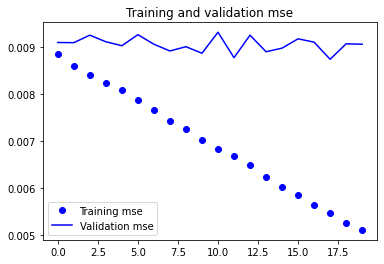

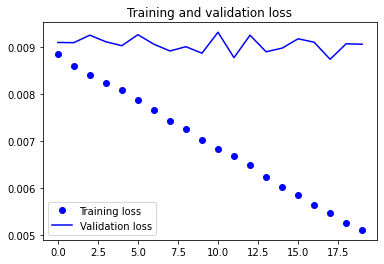

In [58]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig(workdir + '//mse_loss_plot.png')
plt.show()

In [ ]:
### overfitting